In [14]:
#########################
######### ROUTINE TO PLOT THE SEASONAL MEAN OF ANY VARIABLE OVER AN ALREADY 
######### SELECTED REGION.
#########################

import cartopy

import cartopy.feature as cfeat
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import xarray as xr
import numpy as np

import datetime
import pandas

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [15]:
#########################
######### DICTIONARIES DEFINITION 
#########################

Range_MLD = {
    'Mar' : {
        'vmin' : 160, 
        'vmax' : 1800},
    'Sep' : {
        'vmin' : 18, 
        'vmax' : 180},
}


#Colorbar parameters
color_bar = {
    'cmap' : 'YlGnBu',
    'orientation' : 'vertical',
    'title_cbr' : 'depth [m]'
}


In [16]:
def Times(data):
    dat = data.time.values
    dat = pandas.to_datetime(dat, format='%y')
    month = dat.strftime('%b')
    year = dat.strftime('%Y')
    day =  dat.strftime('%d')
    
    return(month, year, day)


def Params(dic, var):
    if(dic['cmap']==None):
        dic['cmap'] = 'magma'
        
    if(dic['orientation']==None):
        dic['orientation'] = 'vertical'
    
    if(dic['title_cbr']==None):
        dic['title_cbr'] = str(var.long_name)
    return(dic)


def Grid(data_set):
    x = data_set.longitude
    y = data_set.latitude
    
    x, y = np.meshgrid(x, y)
    return(x, y)


def Axes_sel(Ncols, axs, i, j):
    if (Ncols == 1):
            ax = axs[i]
    else:
            ax = axs[i,j]
    return(ax)


def Reg(ax):
    import matplotlib.patches as mpatches
    #Lab
    ax.add_patch(mpatches.Rectangle(xy=[-55, 56], width=4, height=3,
                                        facecolor='black',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
    #Irm
    ax.add_patch(mpatches.Rectangle(xy=[-39, 58], width=4, height=3,
                                        facecolor='red',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
    #Gul
    ax.add_patch(mpatches.Rectangle(xy=[-57, 35], width=4, height=3,
                                        facecolor='green',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )
    #NE
    ax.add_patch(mpatches.Rectangle(xy=[-20, 50], width=4, height=3,
                                        facecolor='m',
                                        alpha=0.2,
                                        transform=ccrs.PlateCarree())
                     )


In [17]:
dir_1 = '/home/lgarcia/Documents/data_ARMOR/'
dir_2 = '/net/alpha/exports/sciences/data/LPO_ISAS/ANA_ISAS15/fld2D/'


fl_n1 = 'ARMOR_*.nc'
fl_n2 = 'ISAS15_DM_2006_2015_MLDS.nc'
fl_n3 = 'ISAS15_DM_2002_2015_MLDS_0.03.nc'
fl_n4 = 'ISAS15_DM_2002_2015_MLDS_0.015.nc'
fl_n5 = 'ISAS15_DM_2002_2015_MLDS_0.046.nc'

c_armor = xr.open_mfdataset(dir_1 + fl_n1)
c_isas = xr.open_dataset(dir_2 + fl_n2, autoclose=True)
c_isas2 = xr.open_dataset(dir_2 + fl_n3, autoclose=True)
c_isas3 = xr.open_dataset(dir_2 + fl_n4, autoclose=True)
c_isas4 = xr.open_dataset(dir_2 + fl_n5, autoclose=True)


mld_i = c_isas.MLDP
mld_i2 = c_isas2.MLDP
mld_i3 = c_isas3.MLDP
mld_i4 = c_isas4.MLDP
mld_a = c_armor.mlotst


month_a = mld_a.groupby('time.month').mean('time')
month_i = mld_i.groupby('time.month').mean('time')
month_i2 = mld_i2.groupby('time.month').mean('time')
month_i3 = mld_i3.groupby('time.month').mean('time')
month_i4 = mld_i4.groupby('time.month').mean('time')

/usr/local/lib/python3.5/dist-packages/xarray/core/nanops.py:162: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


# Selection of the regions to work on

In this sectionwe can find the regions selected to calculate the seasonal cycle of the MLD. The regions were chosen 

In [18]:
data_sets = [month_a.sel(month=3), month_i.sel(depth=1,month=3),
             month_i2.sel(depth=1, month=3), month_i3.sel(depth=1, month=3),
             month_i4.sel(depth=1, month=3)]

names = ['ARMOR-3D', 'ISAS-original', 'ISAS-003',
         'ISAS-0015', 'ISAS-0046']

month = 'Mar'
projection = ccrs.PlateCarree(360)
region = [-90, 0, 10, 70]    #Lon, Lat

<IPython.core.display.Javascript object>


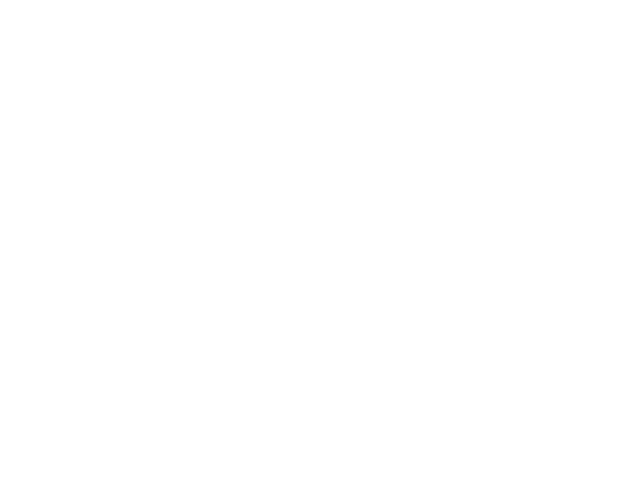

/usr/local/lib/python3.5/dist-packages/dask/array/numpy_compat.py:28: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/dist-packages/numpy/ma/core.py:6449: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


<IPython.core.display.Javascript object>


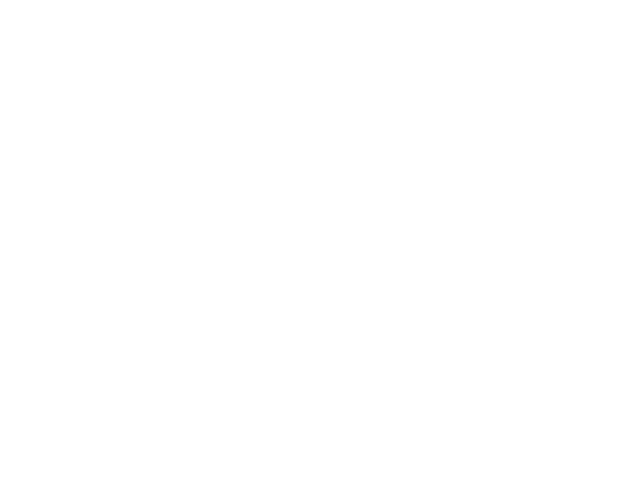

<IPython.core.display.Javascript object>


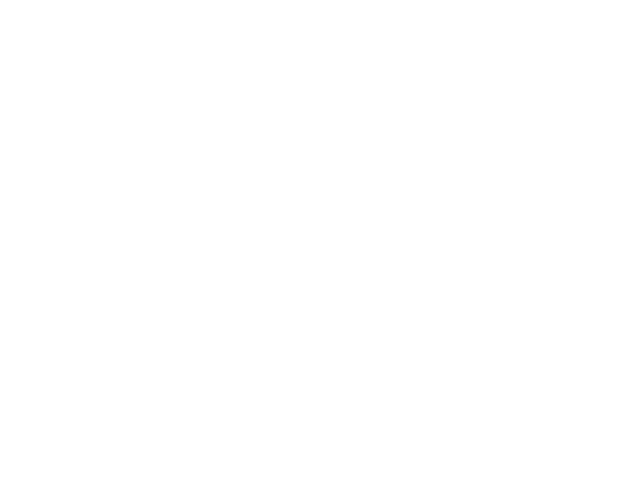

<IPython.core.display.Javascript object>


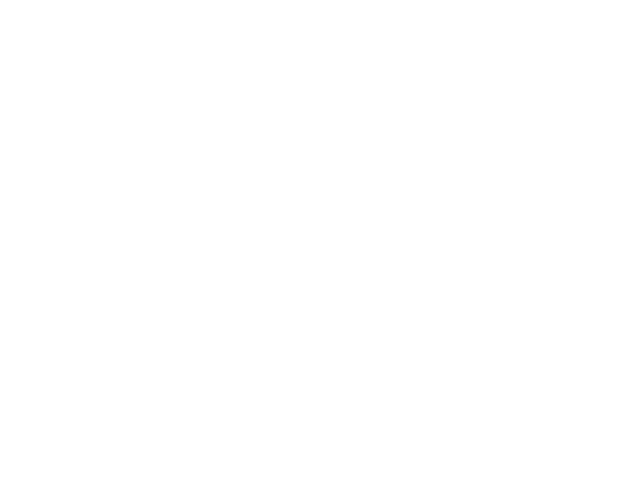

<IPython.core.display.Javascript object>


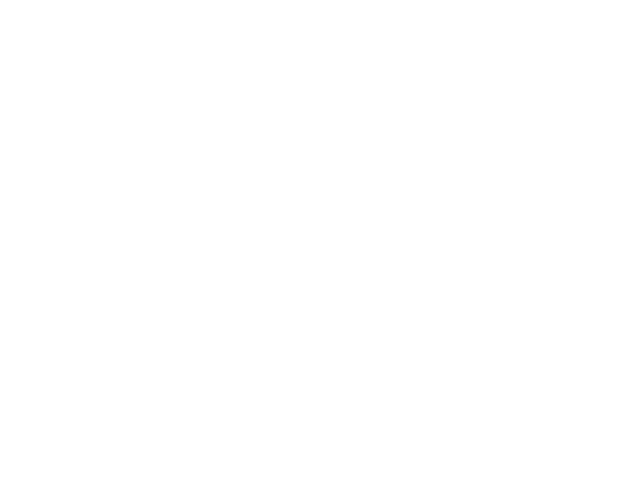

In [19]:
%matplotlib notebook


for i,data in enumerate(data_sets):
    fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw=dict(projection=projection))
    x_n, y_n = Grid(data)
    vmin = Range_MLD[month]['vmin']
    vmax = Range_MLD[month]['vmax']
    
    name = names[i] 

    ax.set_global()
    ax.coastlines('50m')
    ax.set_xticks([-90, -75, -60, -45, -30, -15, 0], crs=ccrs.PlateCarree())
    ax.set_yticks([10, 20, 30, 40, 50, 60, 70], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()

    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.set_extent(region, crs=ccrs.PlateCarree())     #lat, lon
    ax.gridlines()

    contr = ax.contourf(x_n, y_n, data, levels=np.linspace(vmin,vmax,100), cmap='plasma_r')
    ax.set_title( name )

    Reg(ax)

    fig.colorbar(contr, ax=ax, shrink=0.55, label=color_bar['title_cbr'])
    #plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9, wspace = 0.3)
    plt.show()
    plt.savefig(name, bbox_inches='tight')


        
   

In [20]:
regions = {
    'lab': {
        'lon' : (-55, -51),
        'lat' : (56, 59),
        'name' : 'Labrador Sea'
    },
    'irm': {
        'lon' : (-39, -35),
        'lat' : (58, 61),
        'name' : 'Irminger Sea'
    },
    'gul': {
        'lon' : (-57, -53),
        'lat' : (34, 38),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-20, -16),
        'lat' : (50, 53),
        'name' : 'North East Sea'
    }
}

reg_ext = {
    'lab': {
        'lon' : (-60, -30),
        'lat' : (50, 65),
        'name' : 'Labrador and Irminger Seas'
    },
    'gul': {
        'lon' : (-75, -45),
        'lat' : (30, 45),
        'name' : 'Gulf Stream'
    },
    'noe': {
        'lon' : (-30, -5),
        'lat' : (45, 60),
        'name' : 'North East Sea'
    }
}

10.699951 	 853.4


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


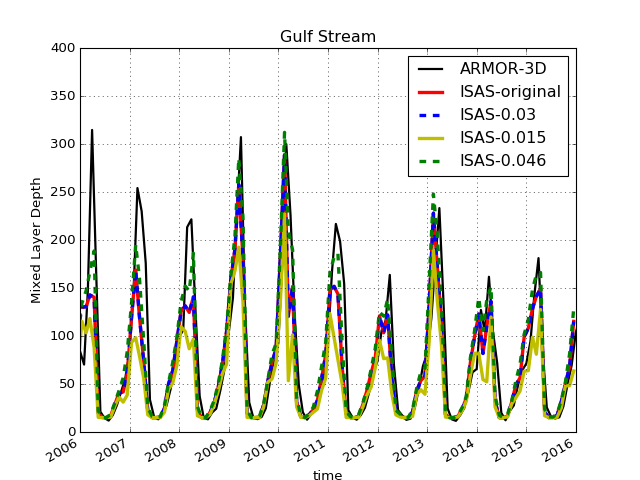

In [22]:
coord = 'gul'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
max = data_a.max(skipna=True).values
min = data_a.min(skipna=True).values
print(min, '\t', max)
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))
data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

data_i2 = mld_i2.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i2 = data_i2.mean(('longitude', 'latitude'))
data_i3 = mld_i3.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i3 = data_i3.mean(('longitude', 'latitude'))

data_i4 = mld_i4.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i4 = data_i4.mean(('longitude', 'latitude'))

#print(data_a, '\n', data_i)
%matplotlib notebook


datm_a.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
datm_i[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
datm_i2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
datm_i3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
datm_i4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('01-01-2006', '01-01-2016')
plt.ylim(0, 400)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper right')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')



/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  import sys


<IPython.core.display.Javascript object>


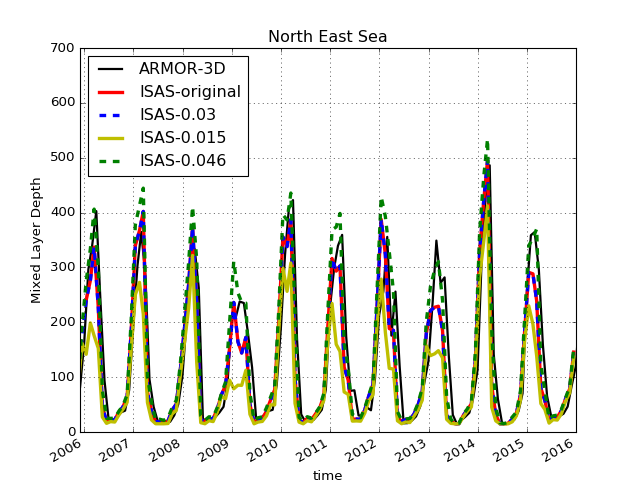

In [39]:
coord = 'noe'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

data_i2 = mld_i2.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i2 = data_i2.mean(('longitude', 'latitude'))

data_i3 = mld_i3.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i3 = data_i3.mean(('longitude', 'latitude'))

data_i4 = mld_i4.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i4 = data_i4.mean(('longitude', 'latitude'))

#print(data_a, '\n', data_i)
%matplotlib notebook


datm_a.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
datm_i[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
datm_i2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
datm_i3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
datm_i4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('30-11-2005', '01-01-2016')
plt.ylim(0, 700)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  import sys


<IPython.core.display.Javascript object>


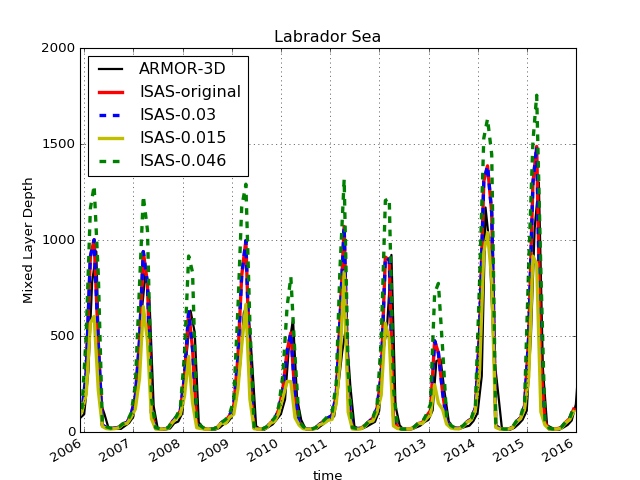

In [41]:
coord = 'lab'
lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

data_i2 = mld_i2.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i2 = data_i2.mean(('longitude', 'latitude'))

data_i3 = mld_i3.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i3 = data_i3.mean(('longitude', 'latitude'))

data_i4 = mld_i4.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i4 = data_i4.mean(('longitude', 'latitude'))

#print(data_a, '\n', data_i)
%matplotlib notebook


datm_a.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
datm_i[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
datm_i2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
datm_i3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
datm_i4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('30-11-2005', '01-01-2016')
plt.ylim(0, 2000)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: 
.resample() has been modified to defer calculations. Instead of passing 'dim' and how="mean", instead consider using .resample(time="M").mean('time') 
  


<IPython.core.display.Javascript object>


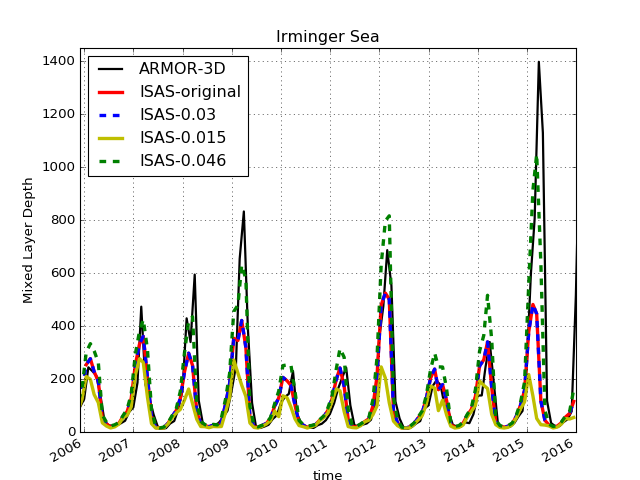

In [42]:
coord = 'irm'

lon1, lon2 = regions[coord]['lon']
lat1, lat2 = regions[coord]['lat']
name_fig = regions[coord]['name']

data_a = mld_a.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_a = data_a.resample('M', dim='time', how='mean').mean(('longitude', 'latitude'))

data_i = mld_i.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i = data_i.mean(('longitude', 'latitude'))

data_i2 = mld_i2.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i2 = data_i2.mean(('longitude', 'latitude'))

data_i3 = mld_i3.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i3 = data_i3.mean(('longitude', 'latitude'))

data_i4 = mld_i4.sel(longitude=slice(lon1, lon2), latitude=slice(lat1, lat2))
datm_i4 = data_i4.mean(('longitude', 'latitude'))

#print(data_a, '\n', data_i)
%matplotlib notebook


datm_a.plot.line(label='ARMOR-3D', linewidth=2, linestyle='-', color='k')
datm_i[:,0].plot.line(label='ISAS-original', linewidth=3, linestyle='-', color='r')
datm_i2[:,0].plot.line(label='ISAS-0.03',linewidth=3, linestyle='--', color='b')
datm_i3[:,0].plot.line(label='ISAS-0.015', linewidth=3, linestyle='-', color='y')
datm_i4[:,0].plot.line(label='ISAS-0.046',linewidth=3, linestyle='--', color='g')

plt.xlim('30-11-2005', '01-01-2016')
plt.ylim(0, 1450)
plt.ylabel('Mixed Layer Depth')
plt.legend(loc='upper left')
plt.title(name_fig)
plt.plot(figsize=(15, 7.5))
plt.grid()
plt.show()
plt.savefig(name_fig, bbox_inches='tight')